In [1]:
import pickle

In [99]:

############Adjustments##############

#options
PATH = '/media/sf_SF/Stage2021/targetedQE/' 
OPTION = 'area' # area or label
PREDICTION = 'prediction/'
PNG = '/media/sf_SF/Stage2021/Projects/MRM_feces/Lactic_acid/bio/resized/'
## Adjustments

filename_Y_labels = 'total_y_matrix.txt'

########################



# load libraries
import pandas as pd
import os
import random
from PIL import Image
import numpy as np


#set paths
path_data_in = PATH + 'data/input/' + 'MachineLearning/'
path_data_out = PATH + 'data/output/' + 'MachineLearning/'
path_data_X = PNG  #png's
path_data_y = path_data_in + 'Yarrays/' #labels


filename = path_data_y + filename_Y_labels

y = pd.read_csv(filename, sep = "\t")

filenames_X_train = []
filenames_X_test = []
filenames_prediction = []

directory_list = os.listdir(path_data_X)
prediction_list = os.listdir(PATH + PREDICTION)

random.shuffle(directory_list)
os.chdir(path_data_X)

i = 0
for filename in directory_list:
    if ".png" in filename :
        if i % 3 == 0: 
            filenames_X_test.append(path_data_X + filename)
        else:
            filenames_X_train.append(path_data_X + filename)
        i = i + 1

for filename in prediction_list :
    filenames_prediction.append(PATH+PREDICTION+filename)   

def load_X_if_matched_in_y(filenames_list,y):
    all_images_as_array=[]
    label=[] 
    area = []  
    global ordered_filenames
    ordered_filenames=pd.DataFrame()
    
    for filename in filenames_list:
        filename_wopath = filename.split('resized/')[1]
        filename_wopath = filename_wopath.strip(".png")

        matching_y = y[y.SampleTargetedcombination==filename_wopath]
        if len(matching_y) == 1:
            label.append(matching_y.iloc[0,5]) 
            ar = matching_y.iloc[0,3]
            area.append(ar)
            
        
            img=Image.open(filename)
            np_array = np.asarray(img)

            l,b,c = np_array.shape    
            np_array = np_array.reshape(l*b*c,)   
            all_images_as_array.append(np_array)
            
            file_area = pd.DataFrame(np.array([[filename_wopath,ar]]))
            ordered_filenames = ordered_filenames.append(file_area, ignore_index=True)
            
            
        if len(matching_y) != 1:
            continue
        
    if OPTION == 'area':
        option = area
    else:
        option = label       
    
    
    return np.array(all_images_as_array), np.array(option)

def load_prediction(filenames_list):
    all_images_as_array=[]

    for filename in filenames_list:

        img=Image.open(filename)
        np_array = np.asarray(img)

        l,b,c = np_array.shape    
        np_array = np_array.reshape(l*b*c,)   
        all_images_as_array.append(np_array)

    
    return np.array(all_images_as_array)
    
prediction = load_prediction(filenames_prediction)
X_train,y_train = load_X_if_matched_in_y(filenames_X_train, y)
X_test, y_test = load_X_if_matched_in_y(filenames_X_test, y)

print(len(y_train))
print(len(X_train))
print(len(y_test))
print(len(X_test))
print(len(prediction))

print(ordered_filenames)

58
58
28
28
1
                                              0                   1
0                        200805s091_Pyruvicacid                 0.0
1                             200805s063_Indole    4335048.62650069
2                 200805s091_LithocholicacidLCA                 0.0
3               200805s071_3Methylthio1propanol                 0.0
4                  200805s063_Indole3Lacticacid    1424728.02705282
5                     200805s071_Dodecanoicacid                 0.0
6                 200805s053_L3Phenyllacticacid    540216662.441185
7                         200805s091_Putrescine                 0.0
8                200805s071_3Hydroxybutyricacid     17509.130265434
9                     200805s091_Isovalericacid                 0.0
10  200805s053_Isocaproicacid4Methylvalericacid                 0.0
11             200805s046_SodiumglycocholateGCA                 0.0
12   200805s016_DPantothenicacidhemicalciumsalt                 0.0
13             200805s046_Sodiumta

In [89]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn import linear_model, datasets
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree


In [90]:
print("Fitting Random Forest regression on training set")

# Fitting the regression model to the dataset
regressor = RandomForestRegressor(n_estimators=10, max_depth=200, random_state = 18)
regressor.fit(X_train, y_train) # Using ravel() to avoid getting 'DataConversionWarning' warning message

#------------------------------------------------------------------------------------------------------------------------#
print("Predicting Values")

# Predicting a new result with regression
y_pred = regressor.predict(X_test)

test_values = prediction

# Applying feature scaling
#test_values = sc_X.transform(test_values)

# Predicting values of new data
new_pred = regressor.predict(test_values)


#------------------------------------------------------------------------------------------------------------------------#
print("\n")
print("Getting Model Accuracy...")

# Get regression details
#print("Estimated Coefficient = ", regressor.coef_)
#print("Estimated Intercept = ", regressor.intercept_)
print("Training Accuracy = ", regressor.score(X_train, y_train))
print("Test Accuracy = ", regressor.score(X_test, y_test))

print("\n")
print("Printing predicted result...")
print("Result_of_prediction = ", new_pred)

Fitting Random Forest regression on training set
Predicting Values


Getting Model Accuracy...
Training Accuracy =  0.9803381128891339
Test Accuracy =  0.5862545744468679


Printing predicted result...
Result_of_prediction =  [2.05692182e+09]


In [100]:
import pickle

filename = 'test_saving_regressor.sav'
pickle.dump(regressor, open(filename, 'wb'))

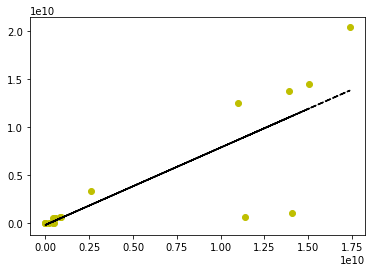

In [91]:
coef = np.polyfit(y_pred,y_test,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.plot(y_pred,y_test, 'yo', y_pred, poly1d_fn(y_pred), '--k')

Text(0, 1, '0.8114924660184974')

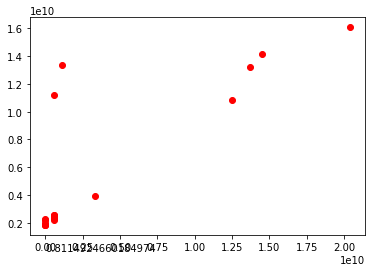

In [92]:
import scipy as sp
linreg = sp.stats.linregress(y_test, y_pred)

plt.plot(y_test, linreg.intercept + linreg.slope*y_pred, 'ro')

plt.text(0, 1, linreg.rvalue)

In [93]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(y_pred, y_test)
print(r_value)

0.8114924660184974


In [94]:
df = pd.DataFrame(data=y_pred)
print(df)

               0
0   1.407145e+10
1   1.774294e+08
2   1.506218e+10
3   1.101832e+10
4   5.684682e+08
5   6.293972e+05
6   8.435345e+08
7   4.543794e+08
8   4.979896e+08
9   8.988996e+08
10  1.389879e+10
11  1.139093e+10
12  1.737503e+10
13  2.583584e+09
14  9.965605e+05
15  8.849890e+05
16  4.324823e+08
17  5.727011e+08


In [95]:
result=pd.concat([ordered_filenames, df], axis=1)

In [101]:
print(result)

                             0                   1             0
0       200929s048_LLacticacid    1083973228.58707  1.407145e+10
1   200929s048_Lalanined3333D3                 0.0  1.774294e+08
2       200929s043_LLacticacid    14515731302.3898  1.506218e+10
3       200929s011_LLacticacid    12500422492.4549  1.101832e+10
4     200929s041_Dopamined4HCL     586637284.62658  5.684682e+08
5   200929s014_Lalanined3333D3    424384.679489579  6.293972e+05
6     200929s014_Dopamined4HCL    597629186.681458  8.435345e+08
7     200929s039_Dopamined4HCL    565346437.426464  4.543794e+08
8   200929s016_Lalanined3333D3    1709990.86732862  4.979896e+08
9     200929s016_Dopamined4HCL    592851657.218494  8.988996e+08
10      200929s012_LLacticacid    13701643881.0486  1.389879e+10
11      200929s002_LLacticacid     605762757.71143  1.139093e+10
12      200929s046_LLacticacid    20380882542.2286  1.737503e+10
13    200929s002_Dopamined4HCL  3351540725.7382803  2.583584e+09
14  200929s045_Lalanined3

In [69]:
result.to_csv('png_with_prediction_area.txt', sep="\t")